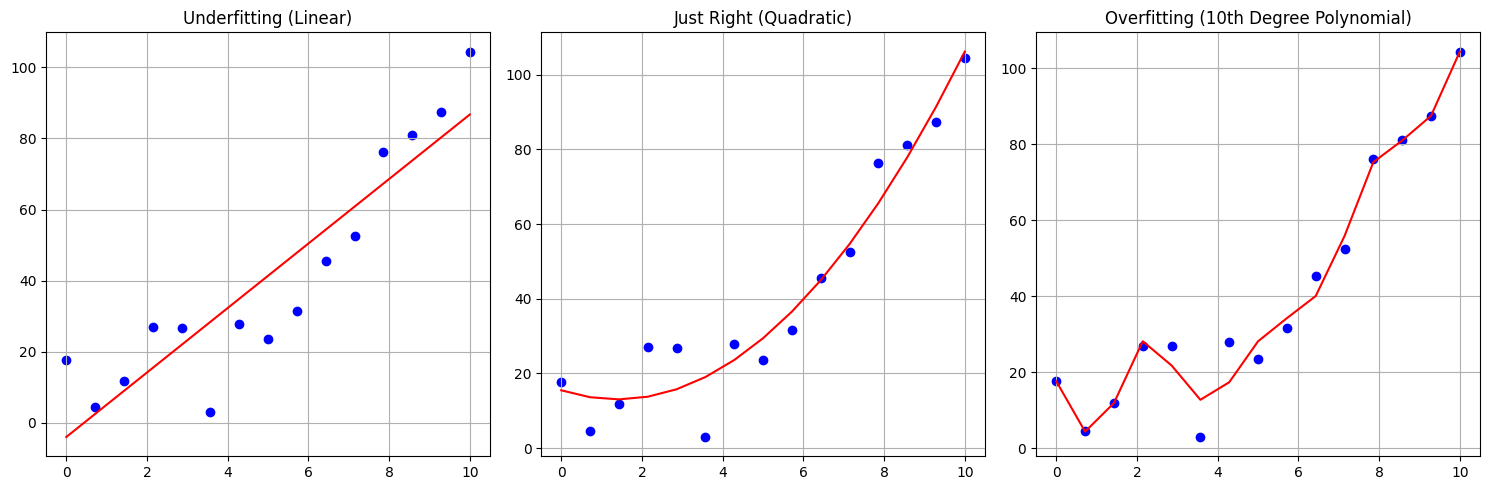

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
x = np.linspace(0, 10, 15)
y = x**2 + np.random.normal(0, 10, len(x))

# Create polynomial fits
p1 = np.polyfit(x, y, 1)  # Linear fit
p2 = np.polyfit(x, y, 2)  # Quadratic fit
p10 = np.polyfit(x, y, 10)  # 10th degree polynomial fit (for overfitting)

# Predict y values based on polynomial fits
y1 = np.polyval(p1, x)
y2 = np.polyval(p2, x)
y10 = np.polyval(p10, x)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Underfitting
axes[0].scatter(x, y, color='blue')
axes[0].plot(x, y1, color='red')
axes[0].set_title('Underfitting (Linear)')
axes[0].grid(True)

# Just right fitting
axes[1].scatter(x, y, color='blue')
axes[1].plot(x, y2, color='red')
axes[1].set_title('Just Right (Quadratic)')
axes[1].grid(True)

# Overfitting
axes[2].scatter(x, y, color='blue')
axes[2].plot(x, y10, color='red')
axes[2].set_title('Overfitting (10th Degree Polynomial)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

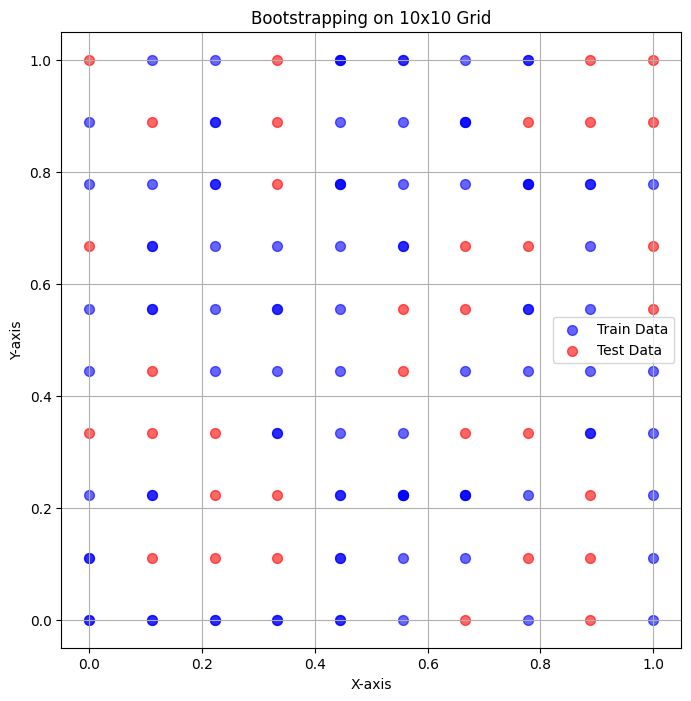

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 10x10 grid of points
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)
points = np.c_[X.ravel(), Y.ravel()]

# Sample with replacement to get the training set
train_indices = np.random.choice(len(points), size=len(points), replace=True)
train_points = points[train_indices]

# The test set is what's left after removing training set
test_mask = np.ones(len(points), dtype=bool)
test_mask[train_indices] = False
test_points = points[test_mask]

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(train_points[:, 0], train_points[:, 1], c='blue', label='Train Data', s=50, alpha=0.6)
plt.scatter(test_points[:, 0], test_points[:, 1], c='red', label='Test Data', s=50, alpha=0.6)
plt.legend()
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bootstrapping on 10x10 Grid')
plt.show()

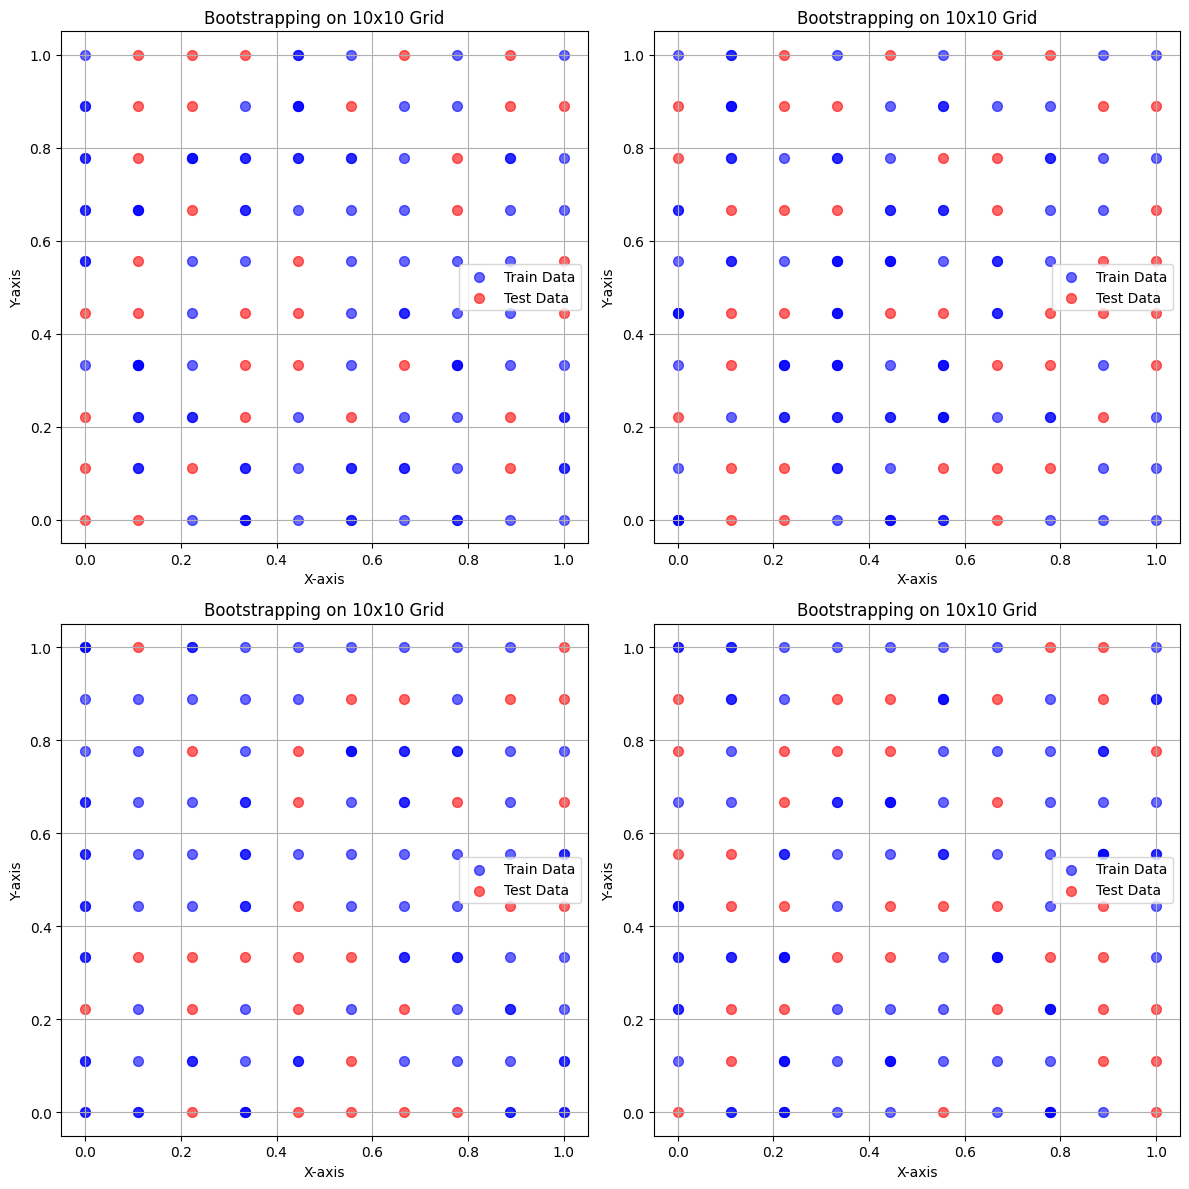

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_plot(ax):
    # Create a 10x10 grid of points
    x = np.linspace(0, 1, 10)
    y = np.linspace(0, 1, 10)
    X, Y = np.meshgrid(x, y)
    points = np.c_[X.ravel(), Y.ravel()]

    # Sample with replacement to get the training set
    train_indices = np.random.choice(len(points), size=len(points), replace=True)
    train_points = points[train_indices]

    # The test set is what's left after removing training set
    test_mask = np.ones(len(points), dtype=bool)
    test_mask[train_indices] = False
    test_points = points[test_mask]

    # Plot the points on the given axis `ax`
    ax.scatter(train_points[:, 0], train_points[:, 1], c='blue', label='Train Data', s=50, alpha=0.6)
    ax.scatter(test_points[:, 0], test_points[:, 1], c='red', label='Test Data', s=50, alpha=0.6)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Bootstrapping on 10x10 Grid')

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# For each axis in 2x2 grid, call bootstrap_plot function
for ax in axs.ravel():
    bootstrap_plot(ax)

plt.tight_layout()
plt.show()


    Suppose we have a circle of radius rr and a square that just encloses this circle.
    The area of the circle is πr2 and the area of the square is (2r)2=4r2.
    The ratio of the areas (circle to square) is πr2=4r2​=π/4​.
    If we randomly throw a large number of points (darts) at the square, the proportion that land inside the circle should approximate the ratio of the areas, or π/4​.
    From the above, we can solve for ππ: π≈4×π≈4× (proportion of points inside the circle).

In [ ]:
import numpy as np

def estimate_pi(num_samples=100000):
    # Generate random points in the [0, 1] x [0, 1] square
    x = np.random.uniform(0, 1, num_samples)
    y = np.random.uniform(0, 1, num_samples)

    # Check if each point is inside the quarter circle (distance from the origin less than 1)
    inside_circle = (x**2 + y**2) <= 1

    # Estimate pi
    pi_estimate = 4 * np.mean(inside_circle)

    return pi_estimate

print(estimate_pi())

3.1426


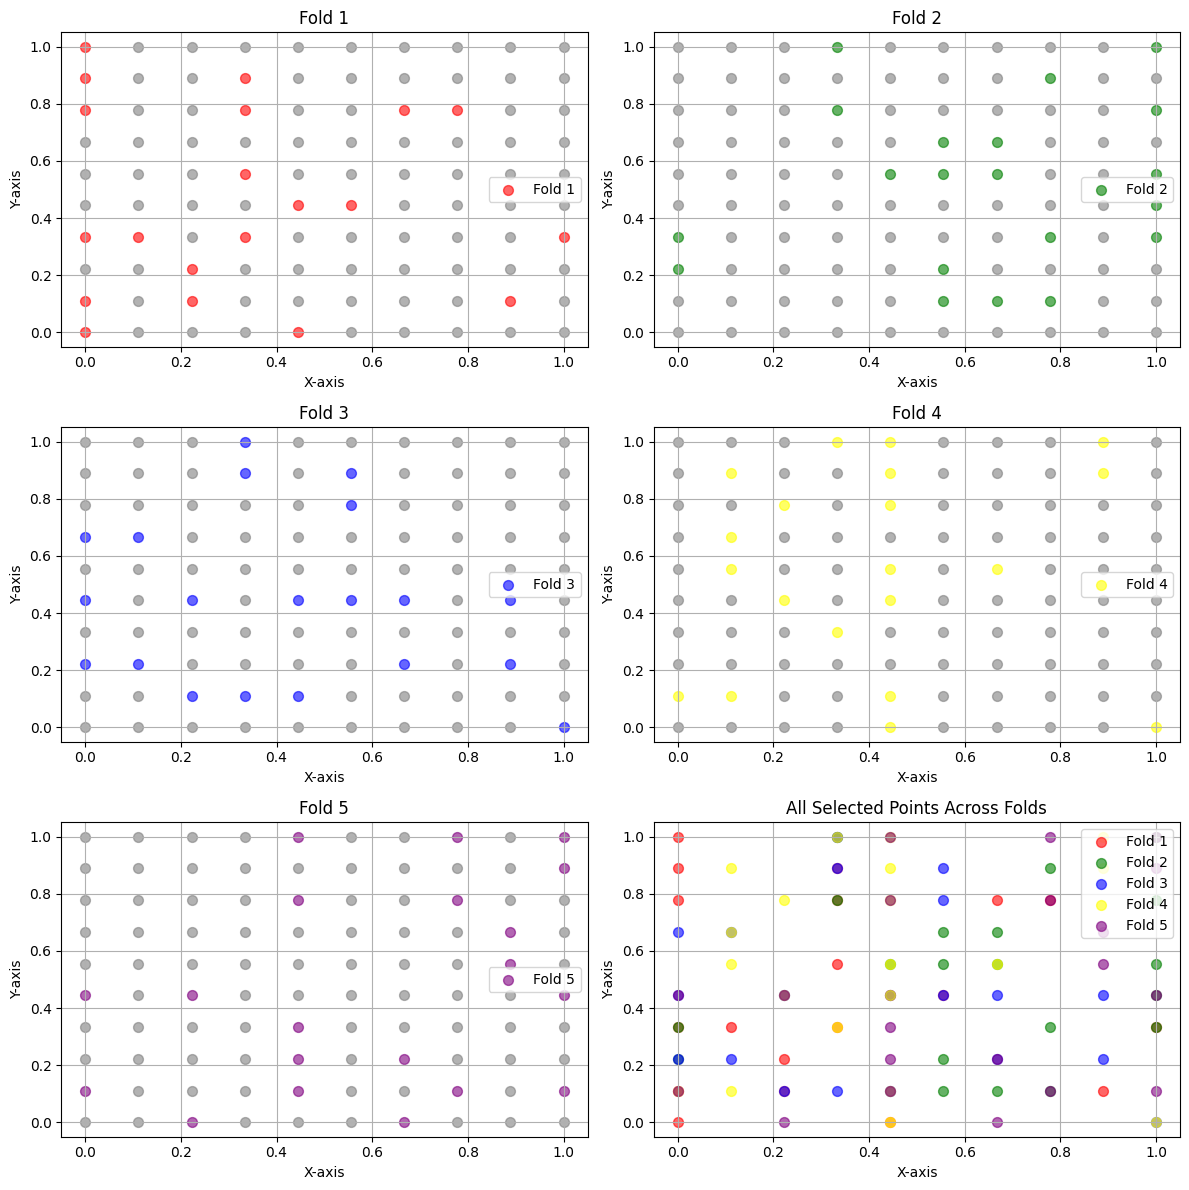

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)
points = np.c_[X.ravel(), Y.ravel()]

# Define the number of points for each fold
num_points = len(points)
points_per_fold = num_points // 5

# Create 3x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Define colors for each fold
colors = ['red', 'green', 'blue', 'yellow', 'purple']

all_sampled_indices = []  # Store indices for each fold

# For each subplot, randomly sample points and mark them
np.random.seed(42)  # Ensure reproducibility
for i in range(5):
    ax = axs[i // 2, i % 2]

    # Randomly sample 1/5 of the data points without replacement
    sampled_indices = np.random.choice(num_points, size=points_per_fold, replace=False)
    all_sampled_indices.append(sampled_indices)

    # Mark sampled points with respective color
    ax.scatter(points[sampled_indices, 0], points[sampled_indices, 1], c=colors[i], s=50, alpha=0.6, label=f'Fold {i+1}')

    # Mark the rest with grey
    remaining_indices = np.setdiff1d(np.arange(num_points), sampled_indices)
    ax.scatter(points[remaining_indices, 0], points[remaining_indices, 1], c='grey', s=50, alpha=0.6)

    ax.legend()
    ax.grid(True)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(f'Fold {i+1}')

# In the final subplot (3,2), show all the selected points across the folds
ax = axs[2, 1]
for i, indices in enumerate(all_sampled_indices):
    ax.scatter(points[indices, 0], points[indices, 1], c=colors[i], s=50, alpha=0.6, label=f'Fold {i+1}')

ax.legend()
ax.grid(True)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('All Selected Points Across Folds')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold

# Sample data: 12 students with their scores
students = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
scores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Convert scores to quartiles
quartiles = np.digitize(scores, bins=[30, 60, 90])

# Non-stratified 3-fold
print("Non-Stratified:")
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train, test in kf.split(students):
    print("Train:", [students[i] for i in train], "Test:", [students[i] for i in test])

print("\nStratified:")
# Stratified 3-fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train, test in skf.split(students, quartiles):
    print("Train:", [students[i] for i in train], "Test:", [students[i] for i in test])


Non-Stratified:
Train: ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'L'] Test: ['A', 'I', 'J', 'K']
Train: ['A', 'D', 'E', 'G', 'H', 'I', 'J', 'K'] Test: ['B', 'C', 'F', 'L']
Train: ['A', 'B', 'C', 'F', 'I', 'J', 'K', 'L'] Test: ['D', 'E', 'G', 'H']

Stratified:
Train: ['A', 'C', 'D', 'G', 'H', 'I', 'J', 'K'] Test: ['B', 'E', 'F', 'L']
Train: ['B', 'D', 'E', 'F', 'H', 'J', 'K', 'L'] Test: ['A', 'C', 'G', 'I']
Train: ['A', 'B', 'C', 'E', 'F', 'G', 'I', 'L'] Test: ['D', 'H', 'J', 'K']


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


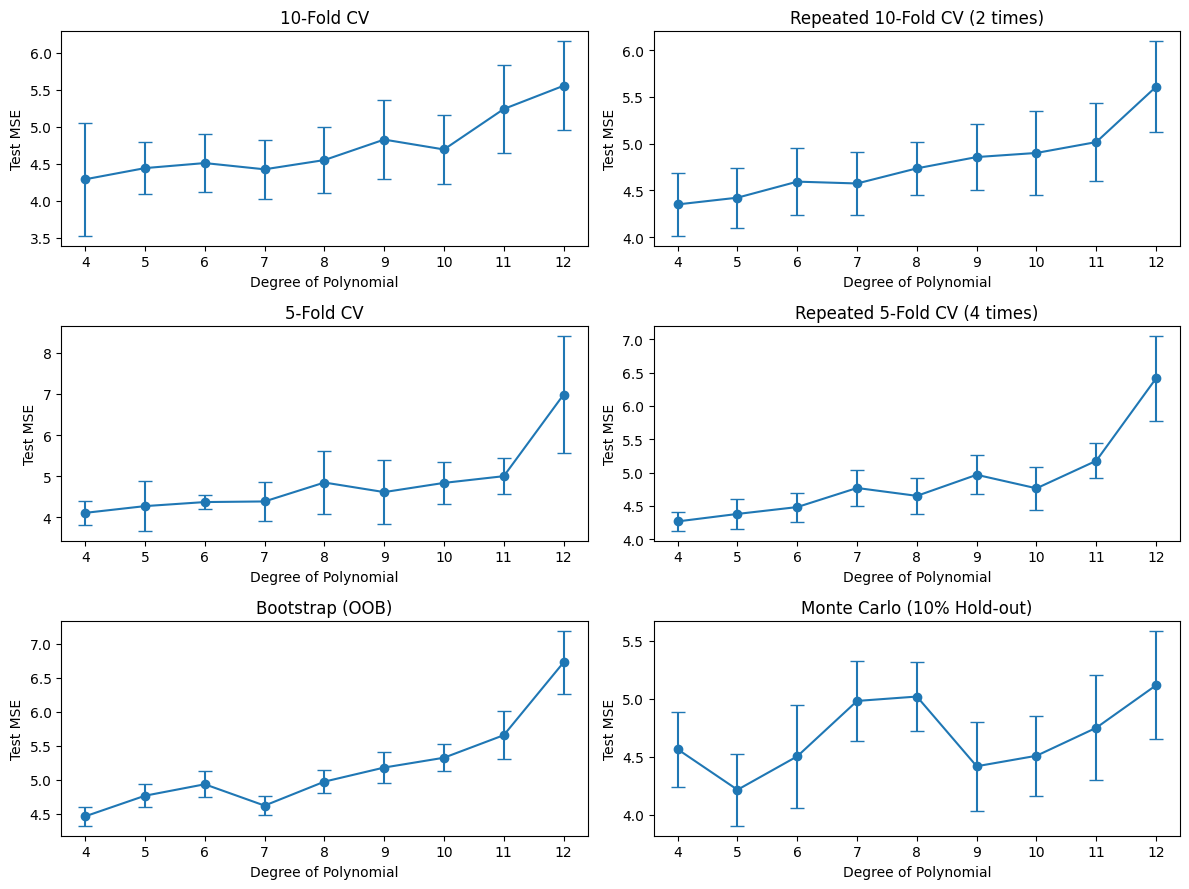

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Given Functions
def sim_x(n):
    x = np.random.random((n,1))
    return x

def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

def sim_y(x, sd=2):
    n = len(x)
    error = np.random.normal(0, sd, n).reshape(n,1)
    y = f(x) + error
    return y

# Generate the data
np.random.seed(0)  # Seed for reproducibility
x = sim_x(100)
y = sim_y(x)

# Helper function to evaluate polynomial regression and get MSE
def evaluate_mse(X_train, X_test, y_train, y_test, degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)
    predictions = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, predictions)

    return mse

# Initialize the figure
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

# For each method, collect means and std errs and then plot with error bars
for idx, (kf, repetitions, title, ax) in enumerate([(KFold(10, shuffle=True), 1, '10-Fold CV', axes[0, 0]),
                                                    (KFold(10, shuffle=True), 2, 'Repeated 10-Fold CV (2 times)', axes[0, 1]),
                                                    (KFold(5, shuffle=True), 1, '5-Fold CV', axes[1, 0]),
                                                    (KFold(5, shuffle=True), 4, 'Repeated 5-Fold CV (4 times)', axes[1, 1])]):
    means, std_errs = [], []
    for deg in range(4, 13):
        errors = []
        for _ in range(repetitions):
            for train_index, test_index in kf.split(x):
                X_train, X_test = x[train_index], x[test_index]
                y_train, y_test = y[train_index], y[test_index]
                errors.append(evaluate_mse(X_train, X_test, y_train, y_test, deg))
        means.append(np.mean(errors))
        std_errs.append(np.std(errors) / np.sqrt(len(errors)))

    ax.errorbar(range(4, 13), means, yerr=std_errs, marker='o', capsize=5)
    ax.set_title(title)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('Test MSE')

# For Bootstrap OOB
means, std_errs = [], []
for deg in range(4, 13):
    errors = []
    for _ in range(20):  # Bootstrap 20 times
        train_idx = np.random.choice(len(x), len(x), replace=True)
        oob_idx = [idx for idx in range(len(x)) if idx not in train_idx]

        if oob_idx:  # Ensure there is at least 1 sample not in the bootstrap sample
            X_train, X_test = x[train_idx], x[oob_idx]
            y_train, y_test = y[train_idx], y[oob_idx]
            errors.append(evaluate_mse(X_train, X_test, y_train, y_test, deg))
    means.append(np.mean(errors))
    std_errs.append(np.std(errors) / np.sqrt(len(errors)))

axes[2, 0].errorbar(range(4, 13), means, yerr=std_errs, marker='o', capsize=5)
axes[2, 0].set_title('Bootstrap (OOB)')
axes[2, 0].set_xlabel('Degree of Polynomial')
axes[2, 0].set_ylabel('Test MSE')

# For Monte Carlo with 10% hold-out
means, std_errs = [], []
for deg in range(4, 13):
    errors = [evaluate_mse(*train_test_split(x, y, test_size=0.1), deg) for _ in range(20)]
    means.append(np.mean(errors))
    std_errs.append(np.std(errors) / np.sqrt(len(errors)))

axes[2, 1].errorbar(range(4, 13), means, yerr=std_errs, marker='o', capsize=5)
axes[2, 1].set_title('Monte Carlo (10% Hold-out)')
axes[2, 1].set_xlabel('Degree of Polynomial')
axes[2, 1].set_ylabel('Test MSE')

plt.tight_layout()
plt.show()


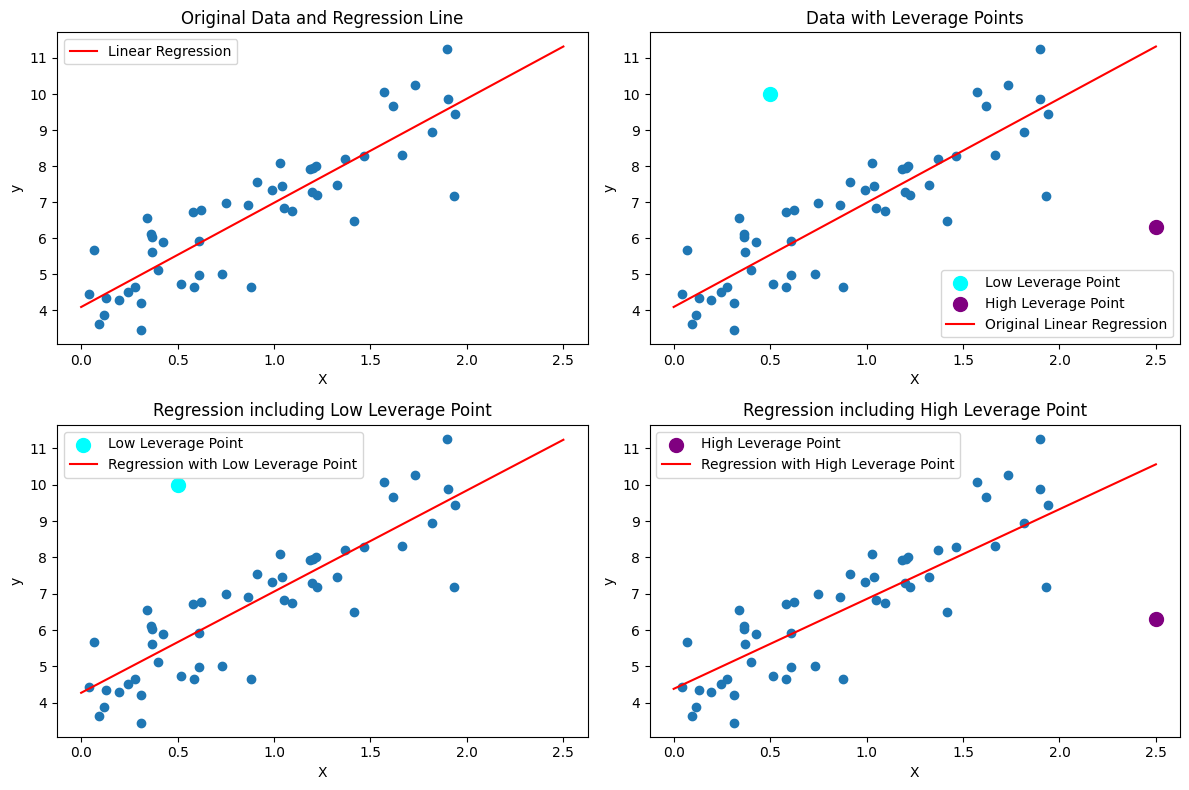

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Random seed for reproducibility
np.random.seed(42)

# Create a simple linear dataset
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X + np.random.randn(50, 1)

# Fit a linear regression model
reg = LinearRegression().fit(X, y)
X_new = np.array([[0], [2.5]])
y_new = reg.predict(X_new)

plt.figure(figsize=(12, 8))

# Plotting original data and regression line
plt.subplot(2, 2, 1)
plt.scatter(X, y)
plt.plot(X_new, y_new, "r-", label="Linear Regression")
plt.title("Original Data and Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Add a point with low leverage
X_low_leverage = np.array([[0.5]])
y_low_leverage = np.array([[10]])

# Add a point with high leverage and move it lower for a more dramatic effect
X_high_leverage = np.array([[2.5]])
y_high_leverage = reg.predict(X_high_leverage) - 5  # Moved 5 units down

# Plotting data with leverage points (but no line fitting)
plt.subplot(2, 2, 2)
plt.scatter(X, y)
plt.scatter(X_low_leverage, y_low_leverage, c='cyan', s=100, label="Low Leverage Point")
plt.scatter(X_high_leverage, y_high_leverage, c='purple', s=100, label="High Leverage Point")
plt.plot(X_new, y_new, "r-", label="Original Linear Regression")
plt.title("Data with Leverage Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Regression including low leverage point
reg_low = LinearRegression().fit(np.vstack([X, X_low_leverage]), np.vstack([y, y_low_leverage]))
y_new_low = reg_low.predict(X_new)

plt.subplot(2, 2, 3)
plt.scatter(X, y)
plt.scatter(X_low_leverage, y_low_leverage, c='cyan', s=100, label="Low Leverage Point")
plt.plot(X_new, y_new_low, "r-", label="Regression with Low Leverage Point")
plt.title("Regression including Low Leverage Point")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Regression including high leverage point
reg_high = LinearRegression().fit(np.vstack([X, X_high_leverage]), np.vstack([y, y_high_leverage]))
y_new_high = reg_high.predict(X_new)

plt.subplot(2, 2, 4)
plt.scatter(X, y)
plt.scatter(X_high_leverage, y_high_leverage, c='purple', s=100, label="High Leverage Point")
plt.plot(X_new, y_new_high, "r-", label="Regression with High Leverage Point")
plt.title("Regression including High Leverage Point")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()
